# Getting to know our data

In [1]:
#importing the libs that we'll be needing.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime


#data set that contains over 4000 TED talks, obtained in Kaggle (kaggle.com/miguelcorraljr/ted-ultimate-dataset?)
df = pd.read_csv('ted_talks_en.csv')

df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."


In [2]:
#getting to know our data (types and not null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [3]:
#checking the amount of null values
df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

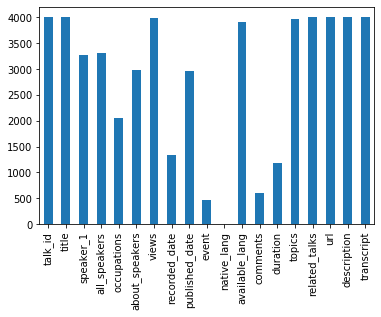

In [4]:
#plotting the unique values of each column
df.nunique().plot(kind='bar')

In [5]:
#before we do anything else, let's apply the 2 decimals float format for better reading of our data
pd.options.display.float_format = "{:,.2f}".format

## Data transformation

In [6]:
#transforming our date columns to datetime formats
df['recorded_date'] = pd.to_datetime(df['recorded_date'])
df['published_date'] = pd.to_datetime(df['published_date'])

In [7]:
df['year'] = pd.DatetimeIndex(df['published_date']).year
df['month'] = pd.DatetimeIndex(df['published_date']).month
df['year_month'] = pd.to_datetime(df['published_date']).dt.to_period('M')
df['day_of_week'] = pd.DatetimeIndex(df['published_date']).dayofweek #monday is 0, tuesday is 1...

In [8]:
#to know which ted talks encourage more comments, we could create a views per comment column
df['views_per_comment'] = np.where(df['comments'].isnull(), None, df['views'] / df['comments'])

In [9]:
df['views_per_comment'] = df['views_per_comment'].astype(float)

## Exploratory analysis

In [10]:
#checking some relevant statistical data of our df
df.describe()

,talk_id,views,comments,duration,year,month,day_of_week,views_per_comment
count,"4,005.00","4,005.00","3,350.00","4,005.00","4,005.00","4,005.00","4,005.00","3,350.00"
mean,"12,432.54","2,148,005.57",162.00,724.01,"2,014.60",6.13,2.11,inf
std,"17,447.58","3,451,225.52",268.84,361.78,3.99,3.47,1.50,nan
min,1.00,0.00,0.00,60.00,"2,006.00",1.00,0.00,727.09
25%,"1,252.00","882,069.00",38.00,393.00,"2,011.00",3.00,1.00,"8,070.31"
50%,"2,333.00","1,375,508.00",89.00,738.00,"2,015.00",6.00,2.00,"16,000.14"
75%,"23,777.00","2,133,110.00",188.00,974.00,"2,018.00",9.00,3.00,"38,260.97"
max,"62,794.00","65,051,954.00","6,449.00","3,922.00","2,020.00",12.00,6.00,inf


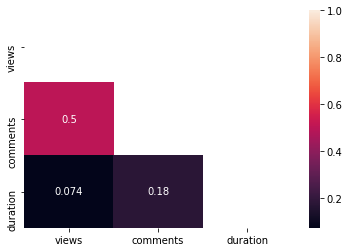

In [11]:
#do longer talks receive more views and/or comments?
corr = df[['views','comments','duration']].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, annot=True, mask=mask)

In [12]:
#do we have speakers that have appeared more than once?
df['speaker_1'].value_counts().head(15)

Alex Gendler        34
Iseult Gillespie    19
Emma Bryce          12
Daniel Finkel       11
Alex Rosenthal      10
Hans Rosling        10
Juan Enriquez        9
Greg Gage            9
Chris Anderson       8
Dan Ariely           7
Marco Tempest        7
Joy Lin              6
Elizabeth Cox        6
Stewart Brand        6
 Rives               6
Name: speaker_1, dtype: int64

In [13]:
#what about speaker occupations?
df['occupations'].value_counts().head(10)

{0: ['writer']}            53
{0: ['journalist']}        47
{0: ['entrepreneur']}      42
{0: ['artist']}            41
{0: ['architect']}         38
{0: ['designer']}          37
{0: ['neuroscientist']}    32
{0: ['psychologist']}      31
{0: ['educator']}          29
{0: ['inventor']}          28
Name: occupations, dtype: int64

In [14]:
#is english the most common native language of the talks?
df['native_lang'].value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
it          1
ar          1
zh-cn       1
ko          1
de          1
pt-br       1
pt          1
Name: native_lang, dtype: int64

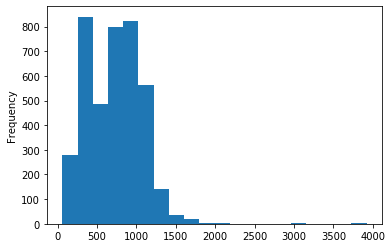

In [15]:
#understanding talks duration distribution
df['duration'].plot(kind='hist',bins=20)

In [16]:
#let's check if we've had more talks published over the years
talks = df[['talk_id','year']].groupby('year').agg({'talk_id':'count'})
talks.head()

,talk_id
year,
2006,49
2007,119
2008,185
2009,215
2010,230


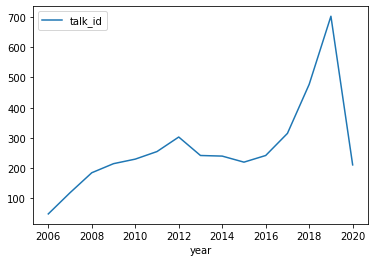

In [17]:
sns.lineplot(data = talks)

did we have less talks pubslished in 2020?

In [18]:
#not really, we just have some incomplete data
df['published_date'].max()

Timestamp('2020-04-30 00:00:00')

In [19]:
#we can algo plot year_month to answer the same question
talks2 = df[['talk_id','year_month']].groupby('year_month').agg({'talk_id':'count'})
talks2.head()

,talk_id
year_month,
2006-06,5
2006-07,7
2006-08,10
2006-09,8
2006-10,11


Text(0.5, 1.0, 'Published talks x Year_Month')

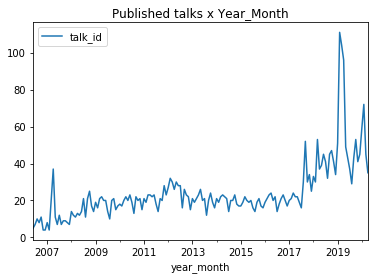

In [20]:
talks2.plot().set_title('Published talks x Year_Month')

In [21]:
#on average, which speaker provoked the most views per comments?
#obtaining the views per comment, quantity of talks they've done and total views
p = df.groupby('speaker_1').agg({'views_per_comment':'mean', 'talk_id':'count', 'views':'sum'}).sort_values('views_per_comment')
p.head(10)

,views_per_comment,talk_id,views
speaker_1,,,
David Bismark,727.09,1,609303
Janet Echelman,908.40,1,2297341
Michael Specter,917.46,1,2170700
Mallika Sarabhai,958.16,1,594059
Elizabeth Lindsey,958.72,1,536881
David Chalmers,968.34,1,2910843
Garth Lenz,"1,076.92",1,851841
Tom Honey,"1,142.26",1,686498
David Birch,"1,144.73",1,238104


In [22]:
#what about speakers that have more than 1 talk in the data set?
p[p['talk_id'] > 1].sort_values('views_per_comment').head(10)

,views_per_comment,talk_id,views
speaker_1,,,
Paul Romer,"1,518.56",2,1209174
Lesley Hazleton,"2,242.07",2,3947345
Gordon Brown,"2,544.63",2,1646099
Rory Stewart,"3,102.05",2,1746445
Karen Armstrong,"3,324.70",3,2757069
Lee Cronin,"4,029.55",2,1820664
Richard Dawkins,"4,231.31",2,9820678
Jonathan Haidt,"4,335.07",4,7726507
Geoff Mulgan,"4,338.60",2,1128081


In [23]:
#what about speakers that have more than 5 talks in the data set?
p[p['talk_id'] > 5].sort_values('views_per_comment').head(10)

,views_per_comment,talk_id,views
speaker_1,,,
Stewart Brand,"10,046.16",6,7027650
Hans Rosling,"11,981.36",10,39871561
Alex Rosenthal,"13,371.00",10,3343962
Rives,"15,367.34",6,11992110
Marco Tempest,"19,322.08",7,16339961
Bill Gates,"22,991.83",6,57107176
Juan Enriquez,"27,878.55",9,18311605
Chris Anderson,"28,071.20",8,32598679
Dan Ariely,"47,308.38",7,24396081


In [24]:
#which event generated the most views?
df.groupby('event')['views'].agg(['mean','sum','count']).sort_values('sum', ascending=False).head(5)

,mean,sum,count
event,,,
TED-Ed,"2,059,996.01",1145357780,556
TED2015,"3,302,706.15",247702961,75
TED2014,"2,860,665.13",240295871,84
TEDGlobal 2013,"3,513,585.58",235410234,67
TED2017,"2,373,413.80",227847725,96


if we didn't consider the quantity of events, and only considered the sum of views, we wouldn't be seeing the whole picture

In [25]:
#on average, which occupation generated the most views?
o = df.groupby('occupations').agg({'views':'mean','talk_id':'count'}).sort_values('views', ascending=False)
o.head(10)

,views,talk_id
occupations,,
"{0: ['psychiatrist', 'psychoanalyst', 'zen priest']}","32,396,714.00",1
{0: ['vulnerability researcher']},"30,642,988.50",2
{0: ['comedian and writer']},"29,889,053.00",3
{0: ['lie detector']},"28,748,868.00",1
{0: ['beatboxer']},"28,495,294.00",1
"{0: ['author', 'educator']}","28,126,839.33",3
{0: ['gentleman thief']},"27,208,963.00",1
{0: ['neuroanatomist']},"26,553,231.00",1
{0: ['quiet revolutionary']},"26,039,073.00",1


In [26]:
#let's look at occupations that had at least 5 talks
o[o['talk_id'] > 4].head(10)

,views,talk_id
occupations,,
{0: ['leadership expert']},"14,825,616.80",5
{0: ['sound consultant']},"10,959,936.20",5
{0: ['social psychologist']},"7,804,653.00",11
{0: ['philanthropist']},"6,784,732.88",8
{0: ['organizational psychologist']},"5,855,316.80",5
{0: ['head of ted']},"5,007,789.17",6
{0: ['novelist']},"4,892,828.80",10
{0: ['activist']},"4,813,569.67",15
{0: ['psychologist']},"4,351,837.06",31


## That will be all for now, thanks (: